# Logistic Regression

In [1]:
import pandas as pd

# Load the dataset
url = 'datasets/Human_Resources.csv'
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Data preparation

In [2]:
# Check for missing values
print(df.isnull().sum())

# Drop missing values (if any)
df.dropna(inplace=True)

# Encode categorical variables into numerical format
df = pd.get_dummies(df, drop_first=True)

# Split the data into features (X) and target (y)
X = df.drop('Attrition_Yes', axis=1)  # Features (all columns except Attrition)
y = df['Attrition_Yes']  # Target (Attrition column)

# Split the data into training, validation, and testing sets
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"X Train: {X_train.shape}, X Val: {X_val.shape}, X Test:{X_test.shape}")
print(f"y Train: {y_train.shape}, y_val: {y_val.shape}, y_test:{y_test.shape}")

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [3]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model with the training data
model.fit(X_train, y_train)


c:\Users\LuisValencia\anaconda3\envs\mmlbook\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [4]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on validation data
y_val_pred = model.predict(X_val)

# Evaluation metrics on validation set
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

# If satisfied with validation performance, evaluate on test set
y_test_pred = model.predict(X_test)

# Evaluation metrics on test set
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))


Validation Accuracy: 0.8727272727272727
Validation Confusion Matrix:
 [[186   2]
 [ 26   6]]
Validation Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.99      0.93       188
        True       0.75      0.19      0.30        32

    accuracy                           0.87       220
   macro avg       0.81      0.59      0.61       220
weighted avg       0.86      0.87      0.84       220

Test Accuracy: 0.8552036199095022
Test Confusion Matrix:
 [[185   7]
 [ 25   4]]
Test Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.96      0.92       192
        True       0.36      0.14      0.20        29

    accuracy                           0.86       221
   macro avg       0.62      0.55      0.56       221
weighted avg       0.81      0.86      0.83       221



In [5]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


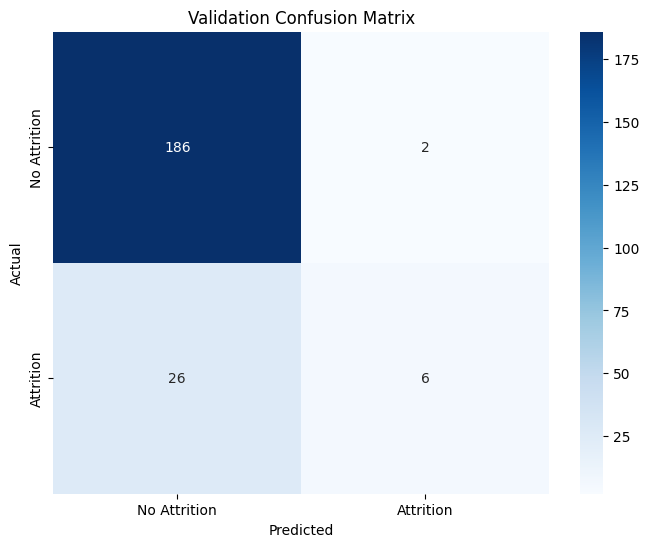

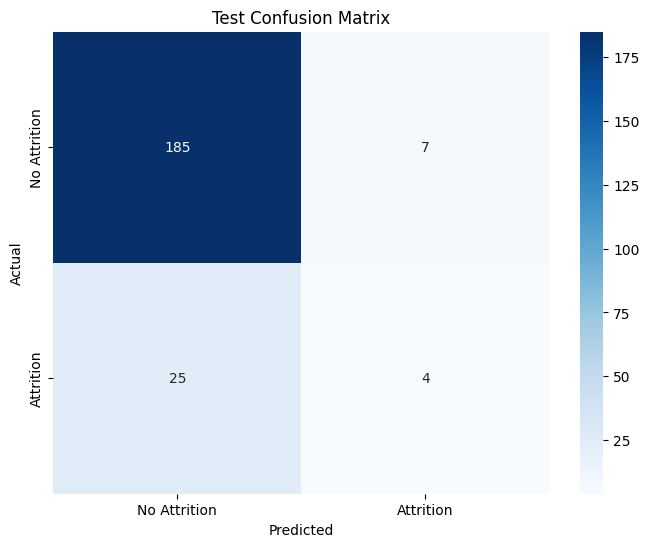

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Plot confusion matrix for validation set
plot_conf_matrix(y_val, y_val_pred, 'Validation Confusion Matrix')

# Plot confusion matrix for test set
plot_conf_matrix(y_test, y_test_pred, 'Test Confusion Matrix')